# Assignment #03

This assignment is composed of 2 tasks that your teams is supposed complete.

1. Create a function to remove "blank slices" from a 3D dataset, which in this case consist of a 3D brain magnetic resonance image. "Blank slices" are slices that do not have signal in them. The "blank slices" should be removed across all three dimensions of the 3D volume.
2. Implement our use an existing data augmentation and generation utility for image segmentation applications


The deliverable of this assignment is this jupyter-notebook completed with your solution. 
    - Create a folder assignment-03. Put the jupyter-notebook with your solution in this repository and send the instructor the link. The repository is the same repository that your team created for assignment 1 and your team final project.

You are being assessed based on:

1. Code execution - 20% 
2. Clarity of the code (e.g., easy to follow, has pertinent comments, etc.) - 20%
3. Proper usage of the techniques seen in class - 40% 
4. Quality of the results - 20%

More details about the assessment are available in the rubric document in the class GitHub repository.

## Remove Blank Slices

For this function, remember that a blank slice is different from a slice that does not have the structire you want to segment.

In [1]:
import numpy as np
import nibabel as nib
import matplotlib.pylab as plt

def remove_blank_slices(img,mask):
    """
    Function to remove blank slices
    """
    img_cropped = img
    mask_cropped = mask
    return img_cropped,mask_cropped

Image and mask shapes before cropping
(171, 256, 256) (171, 256, 256)


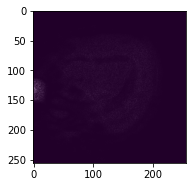

Image and mask shapes after cropping
(171, 256, 256) (171, 256, 256)


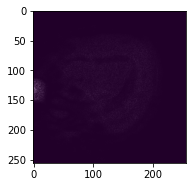

In [2]:
data = nib.load("CC0001_philips_15_55_M.nii.gz").get_fdata() 
mask = nib.load("CC0001_philips_15_55_M_staple.nii.gz").get_fdata()

print("Image and mask shapes before cropping")
print(data.shape, mask.shape)


plt.figure()
plt.subplot(1,2,1)
plt.imshow(data[-1], cmap = "gray")
plt.imshow(mask[-1], alpha = 0.5)
plt.show()

data_cropped, mask_cropped = remove_blank_slices(data ,mask)

print("Image and mask shapes after cropping")
print(data.shape, mask.shape)

plt.figure()
plt.subplot(1,2,1)
plt.imshow(data_cropped[-1], cmap = "gray")
plt.imshow(mask_cropped[-1], alpha = 0.5)
plt.show()

## Data Augmentation and Generation

You can use available utils to propose a solution for this portio nof the assignment.

- [Imgaug](https://imgaug.readthedocs.io/en/latest/)
- [Albumentations](https://albumentations.ai/)
    - Keras. There is a nice tutorial [here](https://stanford.edu/~shervine/blog/keras-how-to-generate-data-on-the-fly). You can also extend the Data Generation utils we created in class to include data augmentation operations ([here](data_generator.py))

Remmeber, the essential steps are:
1. Load a batch of images (randomly and from random volumes)
2. Apply a predetrmined set of random data augmentation transformations
3. Crop the images and mask to a specific patch size and return a batch of samples.

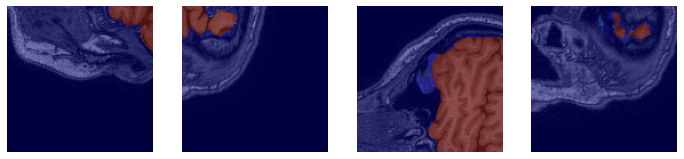

In [9]:
# This is just an example. Feel free to replace it with your own solution
from data_generator import DataGeneratorUnet 
import glob

imgs_list_train = glob.glob(".\\Sample\\Images\\*.npy")
masks_list_train = glob.glob(".\\Sample\\Masks\\*.npy")

batch_size = 4

gen_train = DataGeneratorUnet(imgs_list_train,masks_list_train,batch_size = batch_size)
X,Y = gen_train.__getitem__(0)
plt.figure(figsize = (12,18))
for ii in range(batch_size):
    plt.subplot(1, 4, ii+1)
    plt.imshow(X[ii,:,:,0], cmap = "gray")
    plt.axis("off")
    plt.imshow(Y[ii,:,:,0], cmap='jet', alpha=0.5, interpolation='none')
    plt.axis("off")
plt.show()